<a href="https://colab.research.google.com/github/YashviP/Computer-Vision-Playlist/blob/main/OpenCV/Image_Thresholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is Image Thresholding ?

Given a grayscale image, thresholding algorithms are used to create binary images.
It is useful in extracting dominant foreground and background objects


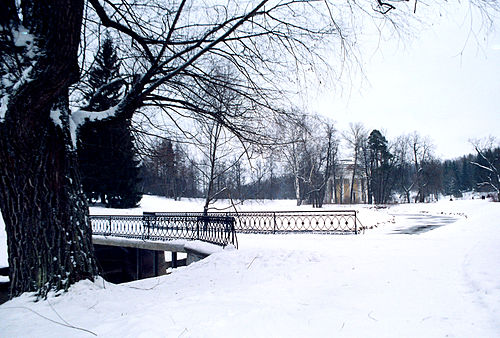

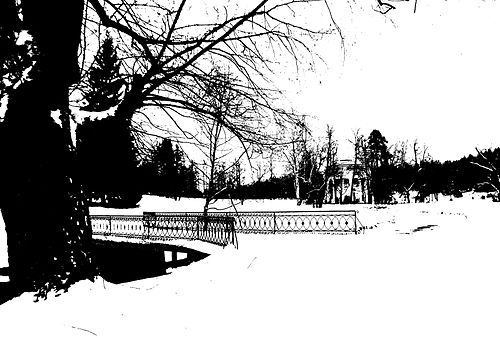

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

### There are two types of Thresholding techniques - 

1. Simple Thresholding 
2. Adaptive Thresholding

## 1. Simple Thresholding 

```
assign X, if pixel value > threshold 

assign Y, else

```



``` cv2.threshold(img,threshold,assigned_value,cv2.THRESH_BINARY) ```

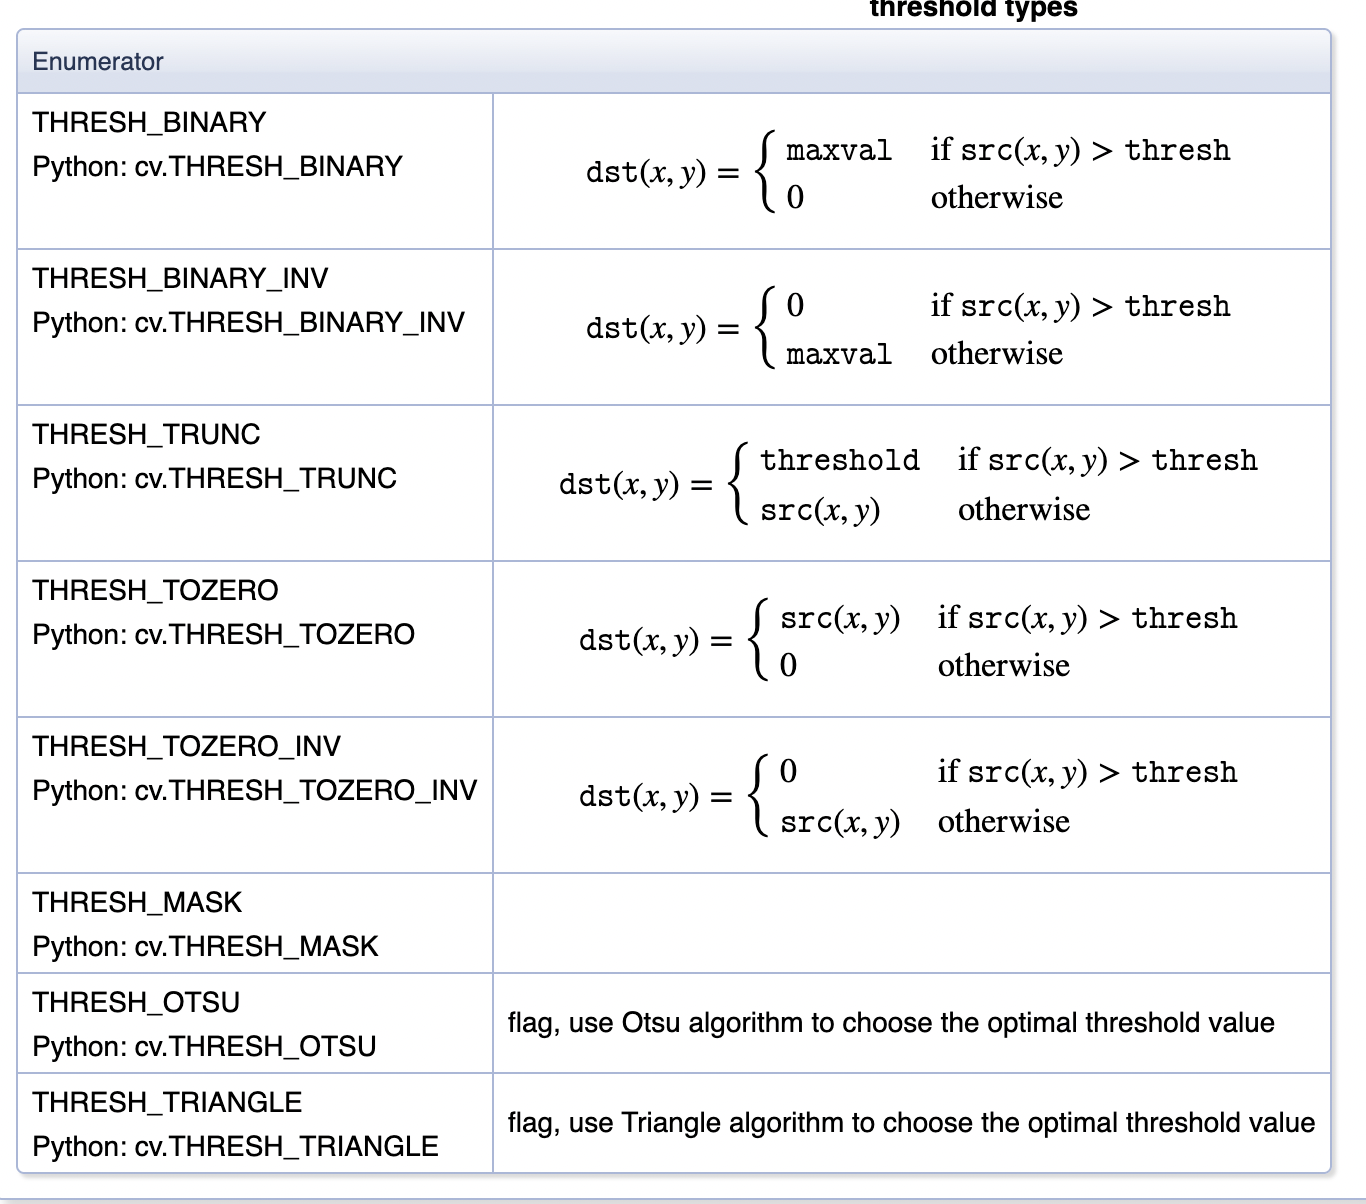

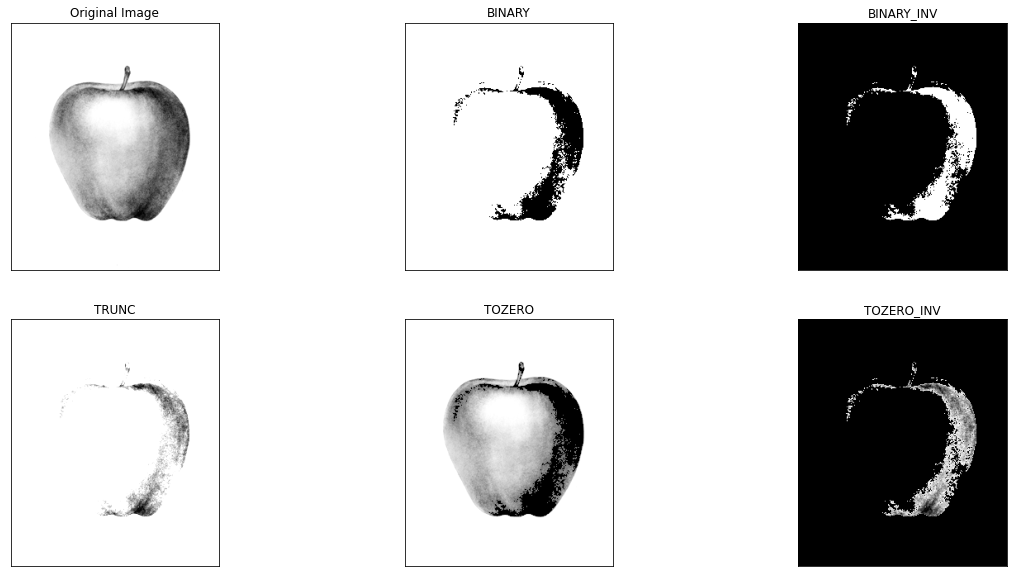

In [ ]:
plt.figure(figsize=(20,10)) 
img = cv2.imread('/content/apple.png',0)
ret,thresh1 = cv2.threshold(img,110,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,110,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,110,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,110,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,110,255,cv2.THRESH_TOZERO_INV)


titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

## 2. Adaptive Thresholding

Different Thresholds for different regions 


Adaptive Method - It decides how thresholding value is calculated.

**cv2.ADAPTIVE_THRESH_MEAN_C**: The threshold value is the mean of the neighbourhood area minus the constant C.

**cv2.ADAPTIVE_THRESH_GAUSSIAN_C**: The threshold value is a gaussian-weighted sum of the neighbourhood values minus the constant C.


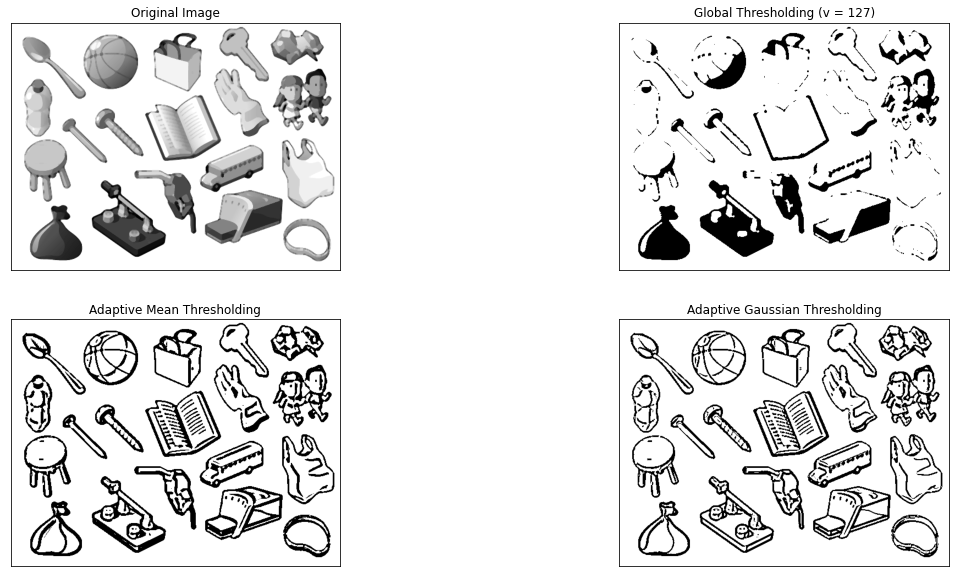

In [ ]:
plt.figure(figsize=(20,10)) 
img = cv2.imread('/content/objects.png',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


## Otsu’s Binarization

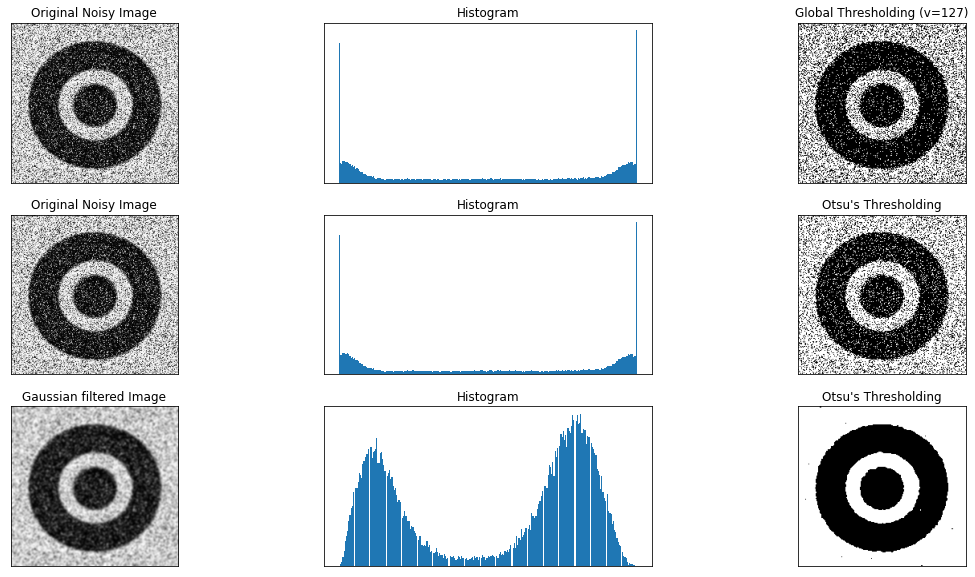

In [ ]:
plt.figure(figsize=(20,10)) 
img = cv2.imread('/content/noisyyy_b.jpeg',0)

# global thresholding
ret1,th1 = cv2.threshold(img,157,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

## OTSU algorithm 

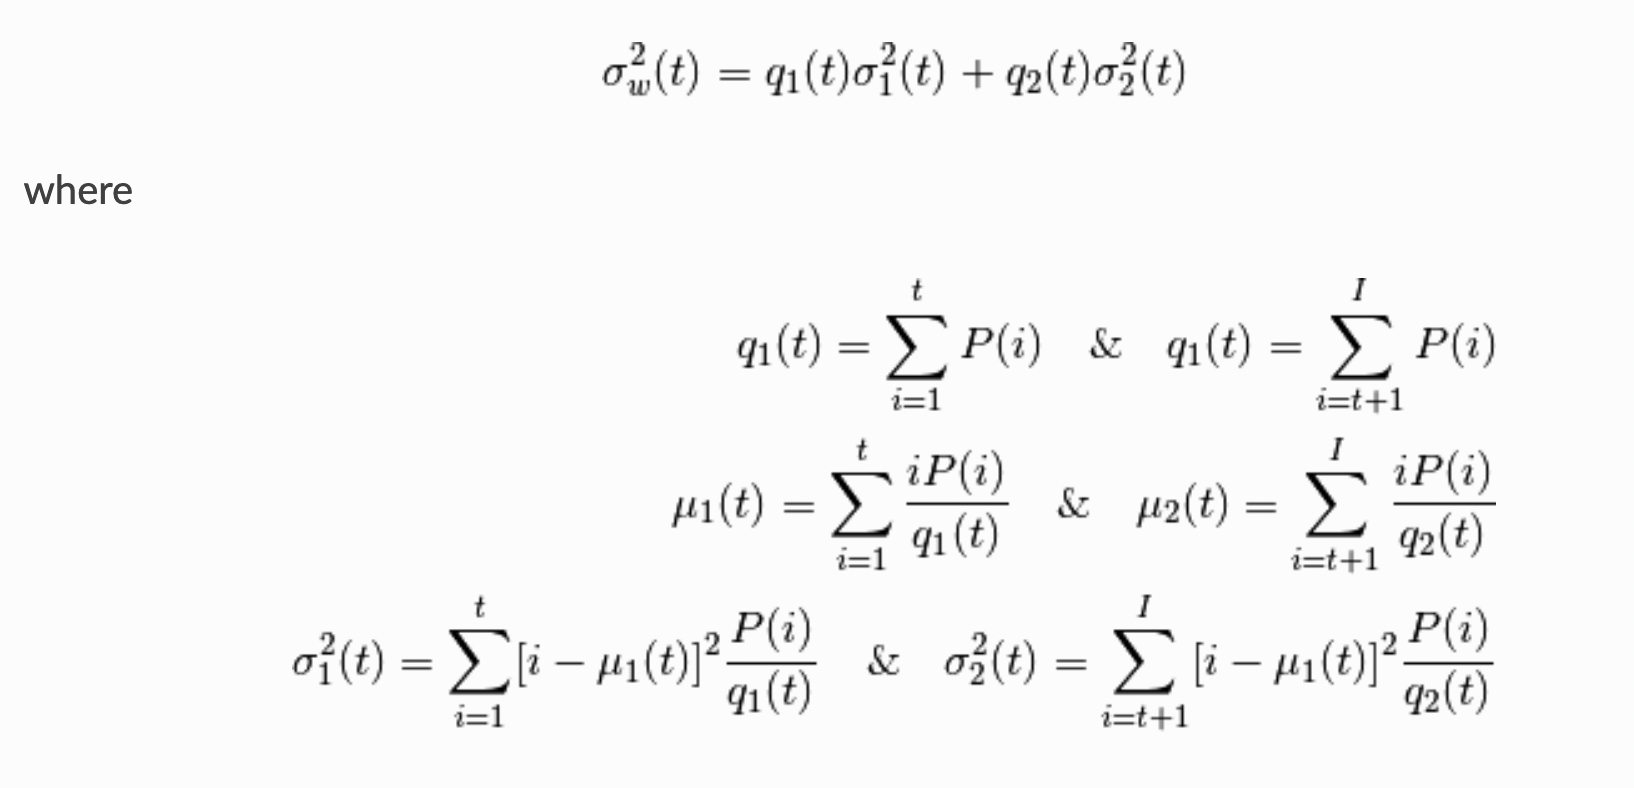
